**DEPENDENCIES**

In [162]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import Counter
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
     
import time 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import re



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **DATA LOADING**

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

train = pd.read_csv("/content/drive/My Drive/nlp-getting-started/train.csv")
test = pd.read_csv("/content/drive/My Drive/nlp-getting-started/test.csv")

# **DATA UNDERSTANDING**

In [0]:
#train.head()

In [0]:
#train.isnull().sum()
#train['target'].value_counts()

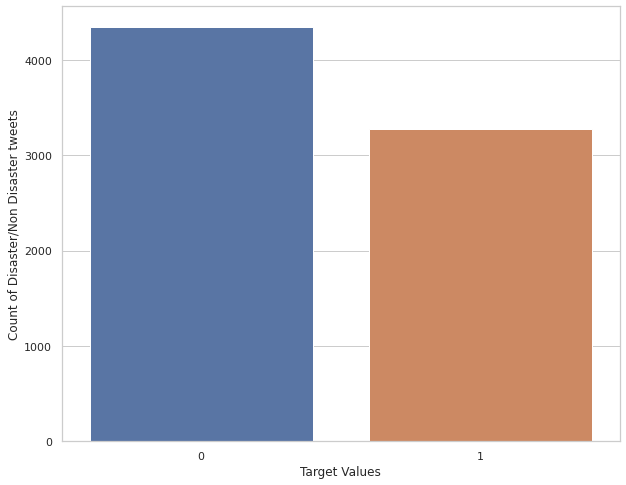

In [168]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
sns.barplot(train['target'].value_counts().index,train['target'].value_counts())
plt.xlabel("Target Values")
plt.ylabel("Count of Disaster/Non Disaster tweets")
plt.show()

In [169]:
# Example of A disaster tweet
disaster_tweets = train[train['target']==1]['text']
disaster_tweets.values[1]

'Forest fire near La Ronge Sask. Canada'

In [170]:
#Example of not a disaster tweet
non_disaster_tweets = train[train['target']==0]['text']
non_disaster_tweets.values[1]

'I love fruits'

In [0]:
#print(train['keyword'].value_counts()[:400].index)

Text(0.5, 0, 'Disaster-Tweet text length by words')

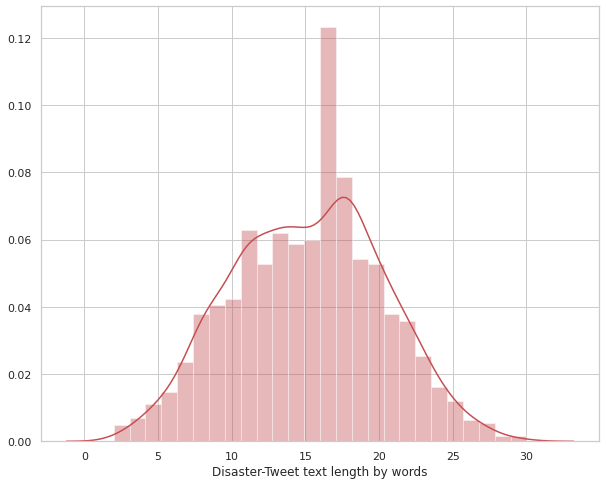

In [172]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
distweetlengthbyWords=train[train["target"] == 1]["text"].str.split().map(lambda x: len(x))
sns.distplot(distweetlengthbyWords,color="r")
plt.xlabel("Disaster-Tweet text length by words")

Text(0.5, 0, 'Non Disaster-Tweet text length by words')

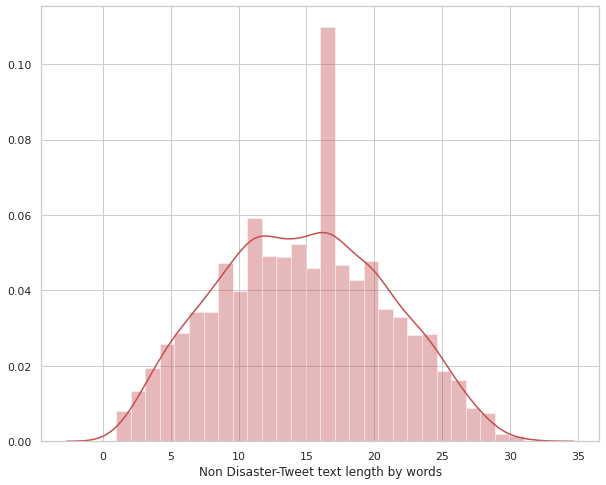

In [173]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
nondistweetlengthbyWords=train[train["target"] == 0]["text"].str.split().map(lambda x: len(x))
sns.distplot(nondistweetlengthbyWords,color="r")
plt.xlabel("Non Disaster-Tweet text length by words")

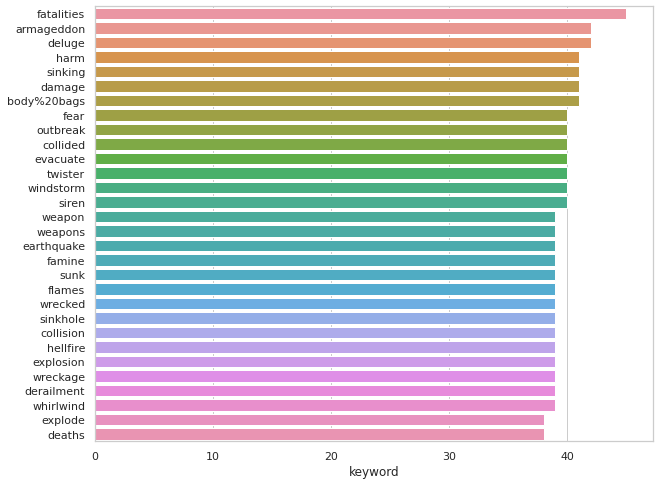

In [174]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
sns.barplot(y=train['keyword'].value_counts()[:30].index,x=train['keyword'].value_counts()[:30],
            orient='h')
plt.show()

In [175]:
# A disaster tweet
disaster_tweets = train[train['target']==1]['text']
disaster_tweets.values[1]

'Forest fire near La Ronge Sask. Canada'

In [176]:
#not a disaster tweet
non_disaster_tweets = train[train['target']==0]['text']
non_disaster_tweets.values[1]

'I love fruits'

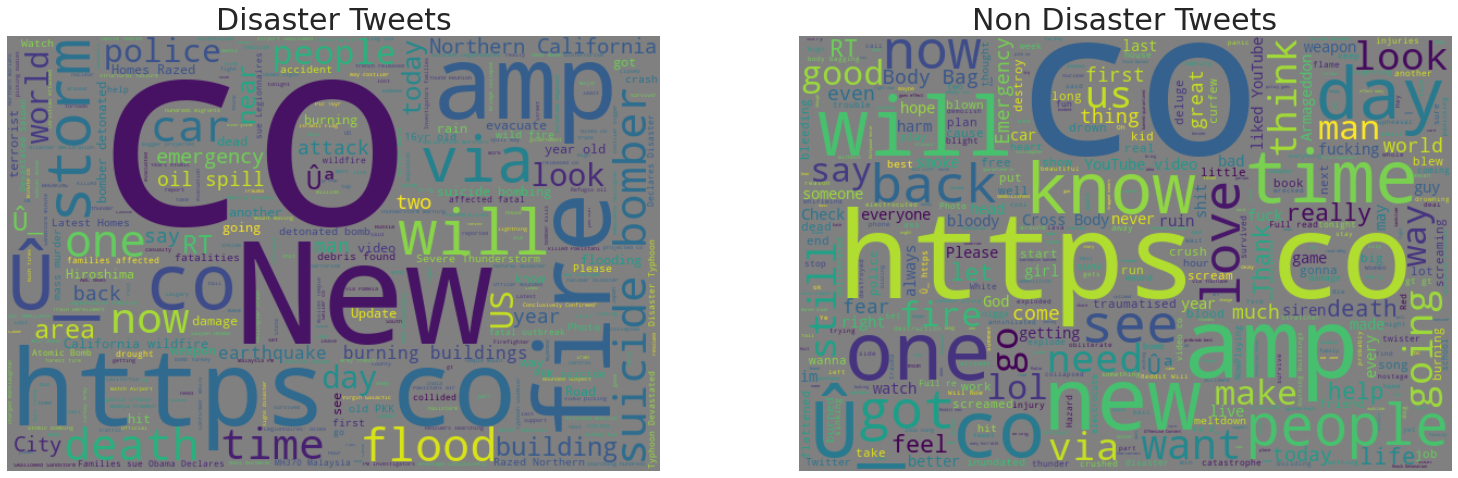

In [177]:
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='grey',
                        width=600,max_words=400,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1,interpolation='bilinear')
wordcloud1.to_file("/content/drive/My Drive/nlp-getting-started/disastertweet.png")
#ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=30);


wordcloud2 = WordCloud( background_color='grey',max_words=400,
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=30);
wordcloud2.to_file("/content/drive/My Drive/nlp-getting-started/nondisastertweet.png")

In [0]:
#train.loc[train['text'].str.contains('http')] 


# **DATA** **CLEANING**

In [0]:
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|[amp]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

def remove_http(text):
    no_http= pattern.sub('',text)
    return no_http

In [0]:

# Code to remove 'http' from  text 
train['text']=train['text'].apply(lambda x : remove_http(x))

In [0]:

#train.loc[train['text'].str.contains('http')].target.value_counts()

In [0]:
#train.loc[train['text'].str.contains('amp')].target.value_counts()

In [182]:
def remove_amp(text):
    no_amp= re.sub('amp','',text)
    return no_amp
train['text']=train['text'].apply(lambda x : remove_amp(x))
train.loc[train['text'].str.contains('amp')].target.value_counts()

Series([], Name: target, dtype: int64)

In [0]:

test['text']=test['text'].apply(lambda x : remove_http(x))

In [0]:
def clean_text(text):
 
    text = re.sub('[^a-zA-Z]', ' ', text)  
    text = text.lower()  # Convert text to lower case
    # split to array(default delimiter is " ") 
    text = text.split()  
    text = [w for w in text if not w in set(stopwords.words('english'))] 
    #print(text) #remove english stop words(like in, the etc) from text
    text = ' '.join(text)    
        
    return text

In [0]:
#text = train.text[3]
#print(text)
#clean_text(text)

In [0]:
# Apply clean text 
train['text'] = train['text'].apply(lambda x : clean_text(x))

In [0]:
# Apply clean text 
test['text']=test['text'].apply(lambda x : clean_text(x))

In [0]:
# Count unique words vocab in the Text column
def counter_word (text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [189]:
text_values = train["text"]

counter = counter_word(text_values)
len(counter)

16059

In [190]:
print(f"The len of unique words is: {len(counter)}")
list(counter.items())[:20]

The len of unique words is: 16059


[('deeds', 2),
 ('reason', 20),
 ('earthquake', 50),
 ('may', 89),
 ('allah', 9),
 ('forgive', 2),
 ('us', 128),
 ('forest', 66),
 ('fire', 254),
 ('near', 56),
 ('la', 24),
 ('ronge', 1),
 ('sask', 1),
 ('canada', 13),
 ('residents', 8),
 ('asked', 9),
 ('shelter', 7),
 ('place', 26),
 ('notified', 1),
 ('officers', 8)]

# **DATA PREPARATION**

In [0]:


vocab_size = len(counter)
embedding_dim = 32
max_length = 25
#In case of out of vocab word use OOV 
oov_tok = "<XXX>"
training_size = 6090
seq_len = 12

In [0]:
# Splitting dataset into ratio of 80:20 for training and testing respectively

training_sentences = train.text[0:training_size]
training_labels = train.target[0:training_size]

testing_sentences = train.text[training_size:]
testing_labels = train.target[training_size:]

In [216]:
print('The Shape of training ',training_sentences.shape)
print('The Shape of testing',testing_sentences.shape)

The Shape of training  (6090,)
The Shape of testing (1523,)


In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [0]:
word_index=tokenizer.word_index

In [219]:
# Lets inspect the first 15 elements
print("THe first word Index are: ")
for x in list(word_index)[0:15]:
    print (" {},  {} ".format(x,  word_index[x]))
print (word_index.items)

THe first word Index are: 
 <XXX>,  1 
 like,  2 
 fire,  3 
 get,  4 
 via,  5 
 new,  6 
 people,  7 
 news,  8 
 emergency,  9 
 one,  10 
 disaster,  11 
 body,  12 
 video,  13 
 burning,  14 
 would,  15 
<built-in method items of dict object at 0x7f18d65ab2d0>


In [0]:
train_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')

In [0]:
#print(train.text[1])
#print(train_sequences[1])

In [0]:
test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

In [223]:
import numpy as np
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/My Drive/nlp-getting-started/glove.6B.100d.txt')
for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))


Found 169140 word vectors.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  import sys


In [0]:
from numpy import zeros
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector


# **DATA MODELLING**

In [0]:
import keras
from keras import backend as K
from keras.models import Model
from keras.models import load_model

# Model Definition with LSTM

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,100, weights=[embedding_matrix],trainable=False, input_length=max_length),
        tf.keras.layers.Dropout(0.10),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
     #tf.keras.layers.LSTM(128),
     tf.keras.layers.Dropout(0.10),
    tf.keras.layers.Dense(14, activation='relu'),
     tf.keras.layers.Dropout(0.10),
    tf.keras.layers.Dense(1, activation='sigmoid')  # remember this is a binary clasification
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [226]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 25, 100)           1605900   
_________________________________________________________________
dropout_12 (Dropout)         (None, 25, 100)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               84480     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 14)                1806      
_________________________________________________________________
dropout_14 (Dropout)         (None, 14)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [227]:
start_time = time.time()

num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

final_time = (time.time()- start_time)/60


Epoch 1/100
191/191 [==============================] - 6s 31ms/step - loss: 0.5001 - accuracy: 0.7714 - val_loss: 0.4325 - val_accuracy: 0.8017
Epoch 2/100
191/191 [==============================] - 5s 27ms/step - loss: 0.4356 - accuracy: 0.8092 - val_loss: 0.4287 - val_accuracy: 0.8142
Epoch 3/100
191/191 [==============================] - 5s 27ms/step - loss: 0.4186 - accuracy: 0.8195 - val_loss: 0.4387 - val_accuracy: 0.8043
Epoch 4/100
191/191 [==============================] - 5s 27ms/step - loss: 0.4045 - accuracy: 0.8253 - val_loss: 0.4184 - val_accuracy: 0.8162
Epoch 5/100
191/191 [==============================] - 5s 28ms/step - loss: 0.3814 - accuracy: 0.8388 - val_loss: 0.4408 - val_accuracy: 0.8070
Epoch 6/100
191/191 [==============================] - 5s 28ms/step - loss: 0.3635 - accuracy: 0.8438 - val_loss: 0.4595 - val_accuracy: 0.8083
Epoch 7/100
191/191 [==============================] - 5s 27ms/step - loss: 0.3445 - accuracy: 0.8507 - val_loss: 0.4449 - val_accuracy:

# **EVALUATION**

In [228]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.500148,0.771429,0.432530,0.801707
1,0.435621,0.809195,0.428653,0.814183
2,0.418581,0.819540,0.438744,0.804334
3,0.404482,0.825287,0.418389,0.816152
4,0.381354,0.838752,0.440838,0.806960


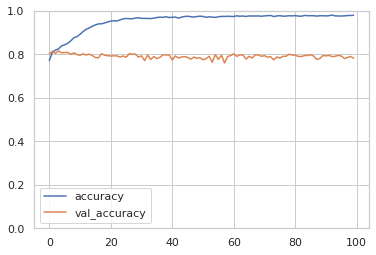

In [229]:
model_loss[['accuracy','val_accuracy']].plot(ylim=[0,1]);

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(testing_padded)   # predict_ clases because is classifi

In [0]:

def show_confusionmatrix(y_actual, y_predicted, title, figsize=(5,4)):
    confmat= confusion_matrix(y_actual, y_predicted, labels=np.unique(y_actual))
    confmat_sum = np.sum(confmat, axis=1, keepdims=True)
    confmat_percent = confmat / confmat_sum.astype(float) * 100
    heatmp = np.empty_like(confmat).astype(str)
    nrows, ncols = confmat.shape
    for i in range(nrows):
        for j in range(ncols):
            c = confmat[i, j]
            p = confmat_percent[i, j]
            if i == j:
                s = confmat_sum[i]
                heatmp[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            else:
                heatmp[i, j] = '%.1f%%\n%d' % (p, c)
    confmat = pd.DataFrame(confmat, index=np.unique(y_actual), columns=np.unique(y_actual))
    confmat.index.name = 'Actual'
    confmat.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(confmat, annot=heatmp, fmt='', ax=ax,linewidths=.5)

array([[698, 116],
       [216, 493]])

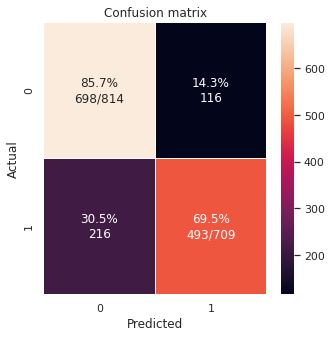

In [234]:
show_confusionmatrix(testing_labels,predictions, 'Confusion matrix', figsize=(5,5))
confusion_matrix(testing_labels, predictions, labels=np.unique(testing_labels))